### Python and  .mat file from matlab
For version -v7.1 and below, _scipy.io_ provides 3 functions to read, load and save matfile:

 - ```loadmat(file_name[, mdict, appendmat])``` : Load MATLAB file.
 - ```savemat(file_name, mdict[, appendmat, …])``` : Save a dictionary of names and arrays into a MATLAB-style .mat file.
 - ```whosmat(file_name[, appendmat])``` : List variables inside a MATLAB file.

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

#### Load .mat
Before loading, you can take a peek into the matfile structure using ```whosmat('matfile')``` like this:

In [2]:
sio.whosmat('cell0.mat')

[('folder', (1,), 'char'),
 ('cfile', (1,), 'char'),
 ('bfile', (1,), 'char'),
 ('afile', (1,), 'char'),
 ('cellimg', (512, 576), 'uint16'),
 ('loadimg', (512, 576), 'double'),
 ('nulfimg', (512, 576), 'double'),
 ('cellrec', (1, 4), 'double'),
 ('rectd', (1, 4), 'double'),
 ('drift', (1, 2), 'double'),
 ('scale', (1, 1), 'double'),
 ('CellArea', (1, 1), 'double'),
 ('cellTrace', (671, 2), 'double'),
 ('gel', (1, 1), 'struct'),
 ('version', (1, 1), 'double'),
 ('cimg', (512, 576, 3), 'double'),
 ('xgrid', (34, 30), 'double'),
 ('ygrid', (34, 30), 'double'),
 ('xdisp', (34, 30), 'double'),
 ('ydisp', (34, 30), 'double'),
 ('dispnoise', (1, 1), 'double'),
 ('outcelldisp', (851, 1), 'double'),
 ('inCell', (117, 1), 'double'),
 ('xnode', (1020, 1), 'double'),
 ('ynode', (1020, 1), 'double'),
 ('dxn', (1020, 1), 'double'),
 ('dyn', (1020, 1), 'double'),
 ('meshsize', (1, 1), 'double'),
 ('dispids', (82, 1), 'double'),
 ('AvgDisp', (1, 1), 'double'),
 ('MaxDisp', (1, 1), 'double'),
 ('xn', (

You can also simply load and then call the loaded mat file but the output would unravel a lot of unnecessary information that should be suppressed:

In [22]:
structx = sio.loadmat('cell0.mat')
structx

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Oct 17 15:31:18 2019',
 '__version__': '1.0',
 '__globals__': [],
 'folder': array(['D:\\Minh\\180604\\MCF10A12%\\'], dtype='<U25'),
 'cfile': array(['bf - Position 0_C1.tiff'], dtype='<U23'),
 'bfile': array(['af - Position 0_C0.tiff'], dtype='<U23'),
 'afile': array(['bf - Position 0_C0.tiff'], dtype='<U23'),
 'cellimg': array([[466, 446, 448, ..., 472, 466, 479],
        [436, 459, 443, ..., 466, 462, 455],
        [430, 453, 450, ..., 436, 462, 458],
        ...,
        [475, 502, 474, ..., 503, 489, 490],
        [493, 504, 492, ..., 489, 478, 476],
        [494, 483, 477, ..., 464, 480, 478]], dtype=uint16),
 'loadimg': array([[26.88242781, 19.31103497,  9.42996241, ...,  0.        ,
          0.        ,  0.        ],
        [27.37012824, 21.07457943, 11.72910527, ...,  0.        ,
          0.        ,  0.        ],
        [21.79878159, 18.23165051, 11.53596812, ...,  0.        ,
          0.        ,  

To access a variable in the mat file, you can simply call the loaded matfile with variable name. This is the same for mat struct file:

In [30]:
structx['gel']

array([[(array([[20000]], dtype=uint16), array([[1.e-04]]), array([[9.2736e-05]]), array([[8.2432e-05]]))]],
      dtype=[('E', 'O'), ('height', 'O'), ('length', 'O'), ('width', 'O')])

In MATLAB, the struct array must be at least 2D, and we replicate that when we read into SciPy. If you want all length 1 dimensions squeezed out, you can use ```squeeze_me``` argument:

In [20]:
structx = sio.loadmat('cell0.mat',squeeze_me=True)
structx['gel']

array((20000, 9.999999999999999e-05, 9.2736e-05, 8.2432e-05),
      dtype=[('E', 'O'), ('height', 'O'), ('length', 'O'), ('width', 'O')])

Sometimes, it’s more convenient to load the MATLAB structs as python objects rather than numpy structured arrays - it can make the access syntax in python a bit more similar to that in MATLAB. In order to do this, use the ```struct_as_record=False``` parameter setting to ```loadmat```.

In [18]:
structx = sio.loadmat('cell0.mat',struct_as_record=False)
print("field gel is now an object: ",structx['gel'])
#accessing field height of gel (gel is still a 2D narray)
structx['gel'][0,0].height

field gel is now an object:  [[<scipy.io.matlab.mio5_params.mat_struct object at 0x0000019A2287DF48>]]


dtype('O')

```struct_as_record=False``` works nicely with ```squeeze_me```:

In [13]:
structx = sio.loadmat('cell0.mat',struct_as_record=False,squeeze_me=True)
structx['gel'].height

9.999999999999999e-05

Another example using plot:

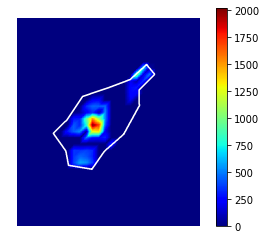

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(structx['stressmap']),cmap=plt.cm.jet)
im2 = ax.plot(structx['cellTrace'][:,1],structx['cellTrace'][:,0],color='w')
ax.axis('off')
fig.colorbar(im, ax=ax)
plt.show(block=False)

#### Save as .mat
Saving struct arrays can be done in various ways. One simple method is to use dicts:

In [42]:
py_dicts = {'gel':{'E':7500,'height':0.1,'length':'800px','width':'600px'}}
sio.savemat('pydicts_matstruct.mat', py_dicts)

Or it can be done using list and objects:

In [73]:
dt = [('E','f8'),('height','f8'),('length','S10'),('width','S10')] 
#f8: 64bit float, 'S10': 10-length zero-terminated bytes (null-terminated string)
gel = np.zeros((1,), dtype=dt)
gel['E'] = 7500
gel['height'] = 0.1
gel['length'] = '800px'
gel['width'] = '600px'
print(gel)
sio.savemat('npObj_matstruct.mat', {'gel': gel})

[(7500., 0.1, b'800px', b'600px')]


#### Note on matlab cell array
Cell arrays in MATLAB are rather like python lists, in the sense that the elements in the arrays can contain any type of MATLAB object. In fact they are most similar to numpy object arrays, and that is how we load them into numpy.

In [69]:
py_carray = sio.loadmat('matcellarray.mat',squeeze_me=True)
cArray = py_carray['cArray']
print([cArray[i] for i in range(0,cArray.size)])

[0, array([1, 2], dtype=uint8), array(['f1', 'f2'], dtype=object), 'rands']


Similarly, a numpy object array can be saved as cell array in MATLAB.

In [77]:
obj_array = np.zeros((4,), dtype=np.object)
obj_array[0] = 0
obj_array[1] = [1,2]
obj_array[2] = np.array(['f1','f2'],dtype=np.object)
obj_array[3] = 'rands'
print(obj_array)
sio.savemat('pyobjArray.mat', {'cArray':obj_array})

[0 list([1, 2]) array(['f1', 'f2'], dtype=object) 'rands']


### Matfile version -v7.3 and above
Matfile version 7.3 and above is saved using hdf5 format (which suports large >2Gb datasets). Unfortunately, hdf5 is not supported by _scipy.io_. We need to use either [Pytables](https://www.pytables.org/) or [h5py](https://www.h5py.org). There are differences in their libraries and implementation, see FAQs of [Pytables](http://www.pytables.org/FAQ.html#how-does-pytables-compare-with-the-h5py-project) and [h5py](https://h5py.readthedocs.io/en/latest/faq.html#what-s-the-difference-between-h5py-and-pytables) for more information. Both of these modules however do not fully support matfile conversion so we will need to restructure the matfile in python before it is usable. Here are some of the [hdf5 way](https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python): 

In [3]:
import h5py
f = h5py.File('cell7.3.mat', 'r')
print(list(f.keys()))
stressmap=np.array(f['stressmap'])
cellTrace=np.array(f['cellTrace'])

type(f['gel'])
print(list(f['gel'].keys()))

['#refs#', 'AvgDisp', 'AvgDispSol', 'AvgRstress', 'AvgStress', 'Avgstress', 'CellArea', 'Dxn', 'Dyn', 'MaxDisp', 'NetMoment', 'Rstress', 'TFmoment', 'afile', 'bfile', 'cellTrace', 'cellimg', 'cellrec', 'cfile', 'cimg', 'dispids', 'dispnoise', 'drift', 'dxn', 'dyn', 'folder', 'gel', 'inCell', 'loadimg', 'maxRstress', 'maxstress', 'meshsize', 'nulfimg', 'outcelldisp', 'rectd', 'scale', 'strainenergy', 'stress', 'stressmap', 'totalForce', 'totalSForce', 'version', 'xRstress', 'xdisp', 'xgrid', 'xn', 'xnode', 'xstress', 'yRstress', 'ydisp', 'ygrid', 'yn', 'ynode', 'ystress']
['E', 'height', 'length', 'width']


Example plot from loaded matfile:

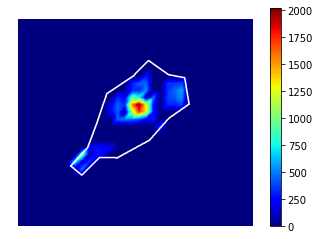

In [45]:
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(stressmap),cmap=plt.cm.jet)
im2 = ax.plot(cellTrace[0],cellTrace[1],color='w')
ax.axis('off')
fig.colorbar(im, ax=ax)
plt.show(block=False)

There is no supported function to save data as matfile -v7.3 in _Pytables_ or _h5py_. However, Matlab can read hdf5 directly so you can simply write data as hdf5 in python using ```hf = h5py.File('data.h5', 'w')``` and read it in matlab using ```hdf5read```.